In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from nameparser import HumanName

# Display Data 

In [2]:
df = pd.read_csv(r"C:\Users\Mohamed Mostafa\Downloads\Total.csv")
df

C:\Users\Mohamed Mostafa\AppData\Local\Temp\ipykernel_13876\2717262080.py:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Mohamed Mostafa\Downloads\Total.csv")


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...
312877,Daniel W Plautz,Public Service Trainee,0.0,0.0,0.0,0.0,0.00,0.00,2018
312878,David J Thompson,Deputy Sheriff,0.0,0.0,0.0,0.0,0.00,0.00,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0.0,0.0,0.0,0.0,0.00,0.00,2018
312880,David Wong,Deputy Sheriff,0.0,0.0,0.0,0.0,0.00,0.00,2018


# Data Cleaning

In [3]:
print(df.isnull().sum())

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64


In [4]:
print(df.duplicated().sum())

0


### Convert object type to numeric value

In [5]:
for column in ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']:
    df[column] = pd.to_numeric(df[column], errors = 'coerce')

### Remove negative values

In [6]:
df= df.loc[df['OtherPay']>=0]
df= df.loc[df['BasePay']>0]
df= df.loc[df['OvertimePay']>=0]
df= df.loc[df['TotalPayBenefits']>=0]
df= df.loc[df['TotalPay']>0]
df= df.loc[df['Benefits']>=0]

### Replace the missing data with the value 0

In [7]:
df['Benefits'] = df['Benefits'].fillna(0)

### Length of data after cleaning

In [8]:
len(df)

273296

# Some operations on dataset

### Make Gender Attribute

In [9]:
gender = []
# define a list of names to predict gender for
names = df['EmployeeName']
# loop over each name and predict the gender
for name in names:
    parsed_name = HumanName(name)
    first_name = parsed_name.first
    gender_prediction = 'unknown'
    if first_name:
        if first_name[-1] in ['a', 'e']:
            gender_prediction = 'female'
        else:
            gender_prediction = 'male'
    gender.append(gender_prediction)
df["Gender"] = gender    

In [11]:
# Convert 'gender' column to numerical values
df['gender'] = df['Gender'].map({'male': 1, 'female': 0, 'unknown':2})
df

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Gender,gender
36159,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,male,1
36160,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,male,1
36161,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,female,0
36162,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,female,0
36163,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,male,1
...,...,...,...,...,...,...,...,...,...,...,...
312805,Joseph S Snell,Recreation Leader,17.03,0.00,0.00,0.17,17.03,17.20,2018,male,1
312839,Damali V Taylor,"BdComm Mbr, Grp5,M$100/Mo",2.76,0.00,0.00,0.02,2.76,2.78,2018,male,1
312843,Abby Porth,Commissioner No Benefits,2.00,0.00,0.00,0.02,2.00,2.02,2018,male,1
312853,Amanda M Eaken,"BdComm Mbr, Grp5,M$100/Mo",0.92,0.00,0.00,0.01,0.92,0.93,2018,female,0


# Important information for analysis

In [12]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Gender,gender
36159,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,male,1
36160,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,male,1
36161,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,female,0
36162,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,female,0
36163,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,male,1


In [13]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,gender
count,273296.000000,273296.000000,273296.000000,273296.000000,273296.000000,273296.000000,273296.000000,273296.000000
mean,71346.206877,5888.527376,3439.451715,25293.239173,80674.185967,105967.425140,2015.099456,0.687229
std,45579.051060,13067.721092,7245.706002,14969.418502,53506.702354,67162.237706,1.997442,0.464364
min,0.100000,0.000000,0.000000,0.000000,0.110000,0.110000,2012.000000,0.000000
25%,38182.515000,0.000000,0.000000,13732.660000,41669.547500,56435.147500,2013.000000,0.000000
50%,68869.315000,0.000000,726.155000,28471.270000,76549.140000,105140.880000,2015.000000,1.000000
75%,101088.000000,5526.337500,3961.760000,35359.537500,113285.122500,148631.770000,2017.000000,1.000000
max,592394.340000,309481.030000,342802.630000,125891.730000,592394.340000,712802.360000,2018.000000,2.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273296 entries, 36159 to 312854
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      273296 non-null  object 
 1   JobTitle          273296 non-null  object 
 2   BasePay           273296 non-null  float64
 3   OvertimePay       273296 non-null  float64
 4   OtherPay          273296 non-null  float64
 5   Benefits          273296 non-null  float64
 6   TotalPay          273296 non-null  float64
 7   TotalPayBenefits  273296 non-null  float64
 8   Year              273296 non-null  int64  
 9   Gender            273296 non-null  object 
 10  gender            273296 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 25.0+ MB


# Analysis of Data

In [15]:
df['BasePay'].mean() # See that it is infact working.

71346.20687650984

In [16]:
df['OvertimePay'].max()

309481.03

### Person who take the most overtime pays

In [17]:
df[df['OvertimePay'] == df['OvertimePay'].max()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Gender,gender
270579,Antonio B Santiago,Deputy Sheriff,105537.56,309481.03,17470.58,57811.14,432489.17,490300.31,2018,male,1


### Persons who take most overtime pay 

In [18]:
df[(df['OvertimePay'] >= 150000) & (df['OvertimePay'] <= 250000)]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Gender,gender
36159,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,male,1
36163,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,male,1
36199,Scott Scholzen,Firefighter,109783.86,160418.47,19873.80,41230.89,290076.13,331307.02,2012,male,1
72943,Gary L Altenberg,"Lieutenant, Fire Suppression",135903.02,163477.81,20994.96,46030.76,320375.79,366406.55,2013,male,1
72964,Whitney P Yee,Deputy Sheriff,95123.00,196689.18,16622.66,36125.49,308434.84,344560.33,2013,male,1
73021,Barry J Bloom,Deputy Sheriff,95123.08,156077.49,17018.22,35837.91,268218.79,304056.70,2013,male,1
110574,Antonio B Santiago,Deputy Sheriff,94191.04,173547.73,19740.81,38238.57,287479.58,325718.15,2014,male,1
110577,Barry J Bloom,Deputy Sheriff,94191.13,173178.23,17960.11,38171.49,285329.47,323500.96,2014,male,1
110583,Whitney P Yee,Deputy Sheriff,94191.00,169659.92,16813.46,38311.07,280664.38,318975.45,2014,male,1
148664,Antonio B Santiago,Deputy Sheriff,97802.93,214393.66,18008.99,43272.94,330205.58,373478.52,2015,male,1


### Job title for one of the most employees that take overtime pays

In [19]:
df[df['OvertimePay'] == df['OvertimePay'].max()]['JobTitle']

270579    Deputy Sheriff
Name: JobTitle, dtype: object

### Total Pay Benefits for one of the most employees that take overtime pays

In [20]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].max()]['TotalPayBenefits']

270573    712802.36
Name: TotalPayBenefits, dtype: float64

### Person who take the most Total Pay Benefits

In [21]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].max()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Gender,gender
270573,Paulo Morgado,Police Officer 3,592394.34,0.0,0.0,120408.02,592394.34,712802.36,2018,male,1


### Person who take the lowest Total Pay Benefits

In [22]:
df[df['TotalPayBenefits'] == df['TotalPayBenefits'].min()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Gender,gender
270567,Aujshanya L S Green,Camp Assistant,0.1,0.0,0.01,0.0,0.11,0.11,2017,female,0


### The mean of each pay per year

In [23]:
df.groupby('Year').mean()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,gender
Year,,,,,,,
2012,66212.629578,5079.317575,3636.335804,26745.519203,74928.282957,101673.802160,0.682703
2013,69631.069053,5368.577324,3811.008327,24131.805491,78810.654705,102942.460196,0.683020
2014,67316.721920,5463.032069,3499.974803,25050.099046,76279.728792,101329.827838,0.686732
2015,69515.811885,5667.022375,3123.541958,24445.301363,78306.376217,102751.677580,0.687025
2016,72120.165052,6217.628319,3203.533595,24323.453889,81541.326967,105864.780856,0.689363
2017,75262.449690,6383.867466,3336.415245,25651.353233,84982.732400,110634.085634,0.690589
2018,78077.001912,6838.410938,3509.256654,26657.228740,88424.669504,115081.898244,0.690162


### Number of jobs

In [24]:
df['JobTitle'].nunique()

1234

### Person who take the most other pay

In [25]:
df[df['OtherPay'] == df['OtherPay'].max()]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Gender,gender
110531,David Shinn,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014,male,1


### The largest ten jobs in base pay 

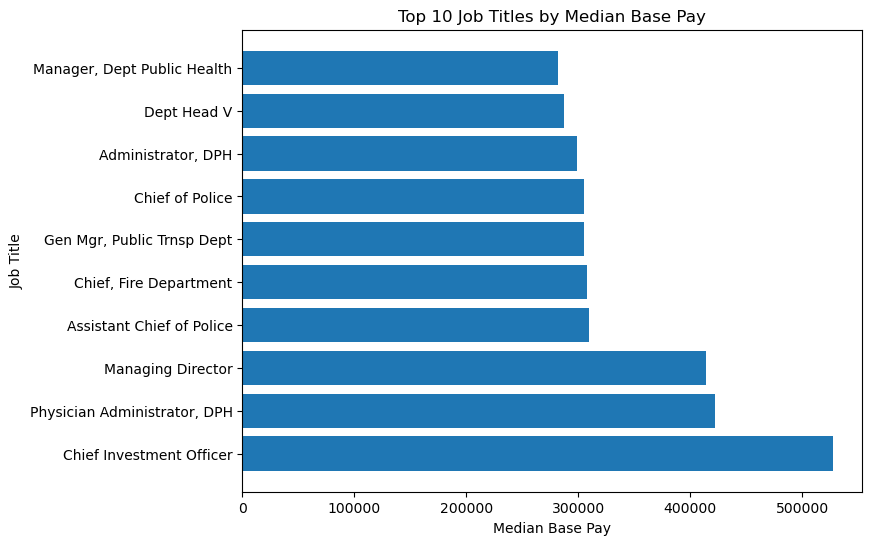

In [26]:
# Assuming 'df' is your DataFrame
data = (df.groupby(['JobTitle'])['BasePay'].median()).nlargest(10)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(data.index, data.values)
ax.set_xlabel('Median Base Pay')
ax.set_ylabel('Job Title')
ax.set_title('Top 10 Job Titles by Median Base Pay')

plt.show()

### The smallest ten jobs in base pay 

In [27]:
(df.groupby(['JobTitle'])['BasePay'].median()).nsmallest(10)

JobTitle
BdComm Mbr, Grp2,M=$25/Mtg        225.000
Special Assistant 14              619.880
BdComm Mbr, Grp3 M=$50/Mtg        700.000
BdComm Mbr, Grp3,M=$50/Mtg        700.000
Commissioner No Benefits          792.275
Commissioner 16.700c, No Pay      805.000
Special Examiner                 1046.015
BdComm Mbr, Grp5,M$100/Mo        1196.000
Testing Technician               1507.675
Assistant Recreation Director    1786.200
Name: BasePay, dtype: float64

### The largest ten jobs in overtime Pay 

In [28]:
(df.groupby(['JobTitle'])['OvertimePay'].median()).nlargest(10)

JobTitle
Mech Shop & Equip Supt            69554.160
Trnst Power Line Wrk Sprv 2       66006.100
Transit Power Line Sprv1          64975.570
Wire Rope Cable Maint Sprv        50560.885
Transportation Operations Spec    49413.435
Transit Power Line Worker         48804.100
Auto Body & Fender Wrk Sprv 1     46109.270
Battlion Chief, Fire Suppressi    43804.275
Battalion Chief, Fire Suppress    42911.890
Track Maint Wrk Sprv 1            41291.800
Name: OvertimePay, dtype: float64

### The largest ten jobs in other Pay 

In [29]:
(df.groupby(['JobTitle'])['OtherPay'].median()).nlargest(10)

JobTitle
Nursing Supervisor Psychiatric    38049.115
Head Airport Electrician          37325.170
Court Supervisor I                34237.890
Water Const&Main Supt             33736.030
Asst Chf of Dept (Fire Dept)      30269.145
Battalion Chief, Fire Suppress    27357.760
Telecommunications Tech Supv      27255.620
Dep Chf of Dept (Fire Dept)       25914.035
Assistant Inspector               24897.180
Plumber Supervisor 2              24642.320
Name: OtherPay, dtype: float64

### The largest ten jobs in Benefits 

In [30]:
(df.groupby(['JobTitle'])['Benefits'].median()).nlargest(10)

JobTitle
Chief Investment Officer        119876.540
Chief, Fire Department           85431.390
Physician Administrator, DPH     85134.890
Managing Director                82143.880
Gen Mgr, Public Trnsp Dept       78454.130
Dep Dir for Investments, Ret     77138.715
Chief of Police                  76329.600
Administrator, DPH               75819.290
Adm, SFGH Medical Center         75257.525
Dept Head V                      75122.430
Name: Benefits, dtype: float64

### The largest ten jobs in total Pay 

In [31]:
(df.groupby(['JobTitle'])['TotalPay'].median()).nlargest(10)

JobTitle
Chief Investment Officer        527343.140
Physician Administrator, DPH    422292.000
Managing Director               414515.720
Chief, Fire Department          336922.010
Chief of Police                 324134.435
Assistant Chief of Police       317086.955
Gen Mgr, Public Trnsp Dept      305307.890
Administrator, DPH              299121.510
Dept Head V                     293107.170
Dep Chf of Dept (Fire Dept)     289257.695
Name: TotalPay, dtype: float64

### The largest ten jobs in total Pay benefits 

In [32]:
(df.groupby(['JobTitle'])['TotalPayBenefits'].median()).nlargest(10)

JobTitle
Chief Investment Officer        641845.820
Managing Director               507526.410
Physician Administrator, DPH    507426.890
Chief, Fire Department          422223.010
Chief of Police                 393130.800
Assistant Chief of Police       386818.185
Gen Mgr, Public Trnsp Dept      386168.490
Administrator, DPH              374940.800
Dept Head V                     370203.070
Dep Chf of Dept (Fire Dept)     365238.835
Name: TotalPayBenefits, dtype: float64

### The most ten jobs which have emolyees

In [33]:
df['JobTitle'].value_counts().head(10)

Transit Operator                17607
Special Nurse                   10789
Registered Nurse                 9155
Firefighter                      5822
Custodian                        5703
Police Officer 3                 5318
Public Service Trainee           4889
Recreation Leader                4768
Public Svc Aide-Public Works     4726
Police Officer                   4169
Name: JobTitle, dtype: int64

### Counting how many times that word 'officer' is in (job title)

In [34]:
def officerWordCount(title):
    if 'officer' in title.lower():
        return True
    else:
        return False
    
sum(df['JobTitle'].apply(lambda title: officerWordCount(title)))

18284

# Visualization

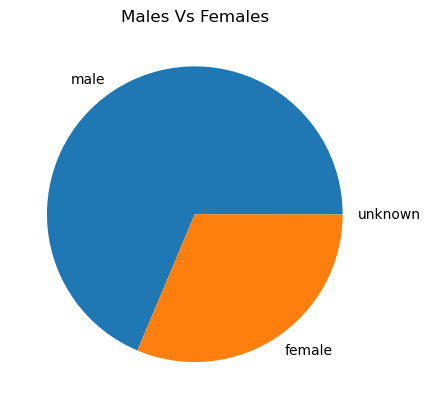

In [35]:
# Count the number of crimes per category
gender_counts = df['Gender'].value_counts()

# Create a pie chart of the crime counts
plt.pie(gender_counts.values, labels=gender_counts.index.tolist())
plt.title('Males Vs Females')
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='BasePay'>

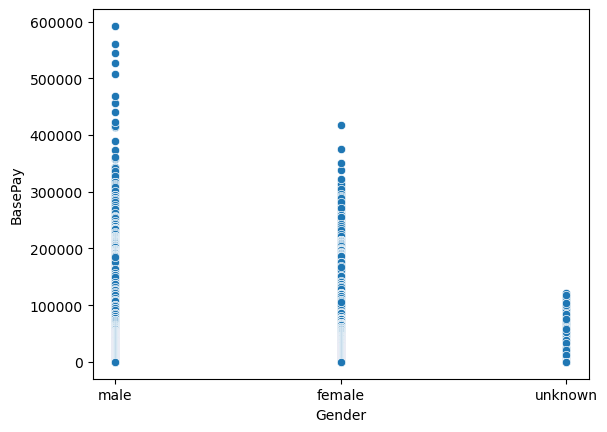

In [36]:
sns.scatterplot(x = 'Gender', y = 'BasePay', data = df)

<AxesSubplot:xlabel='OvertimePay', ylabel='JobTitle'>

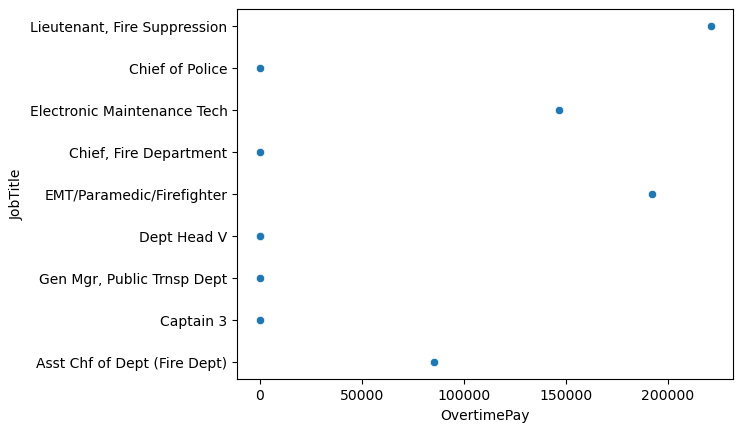

In [37]:
sns.scatterplot(y = df['JobTitle'].head(10) , x = df['OvertimePay'].head(10), data = df)

## Showing that total pays values are very close in all years

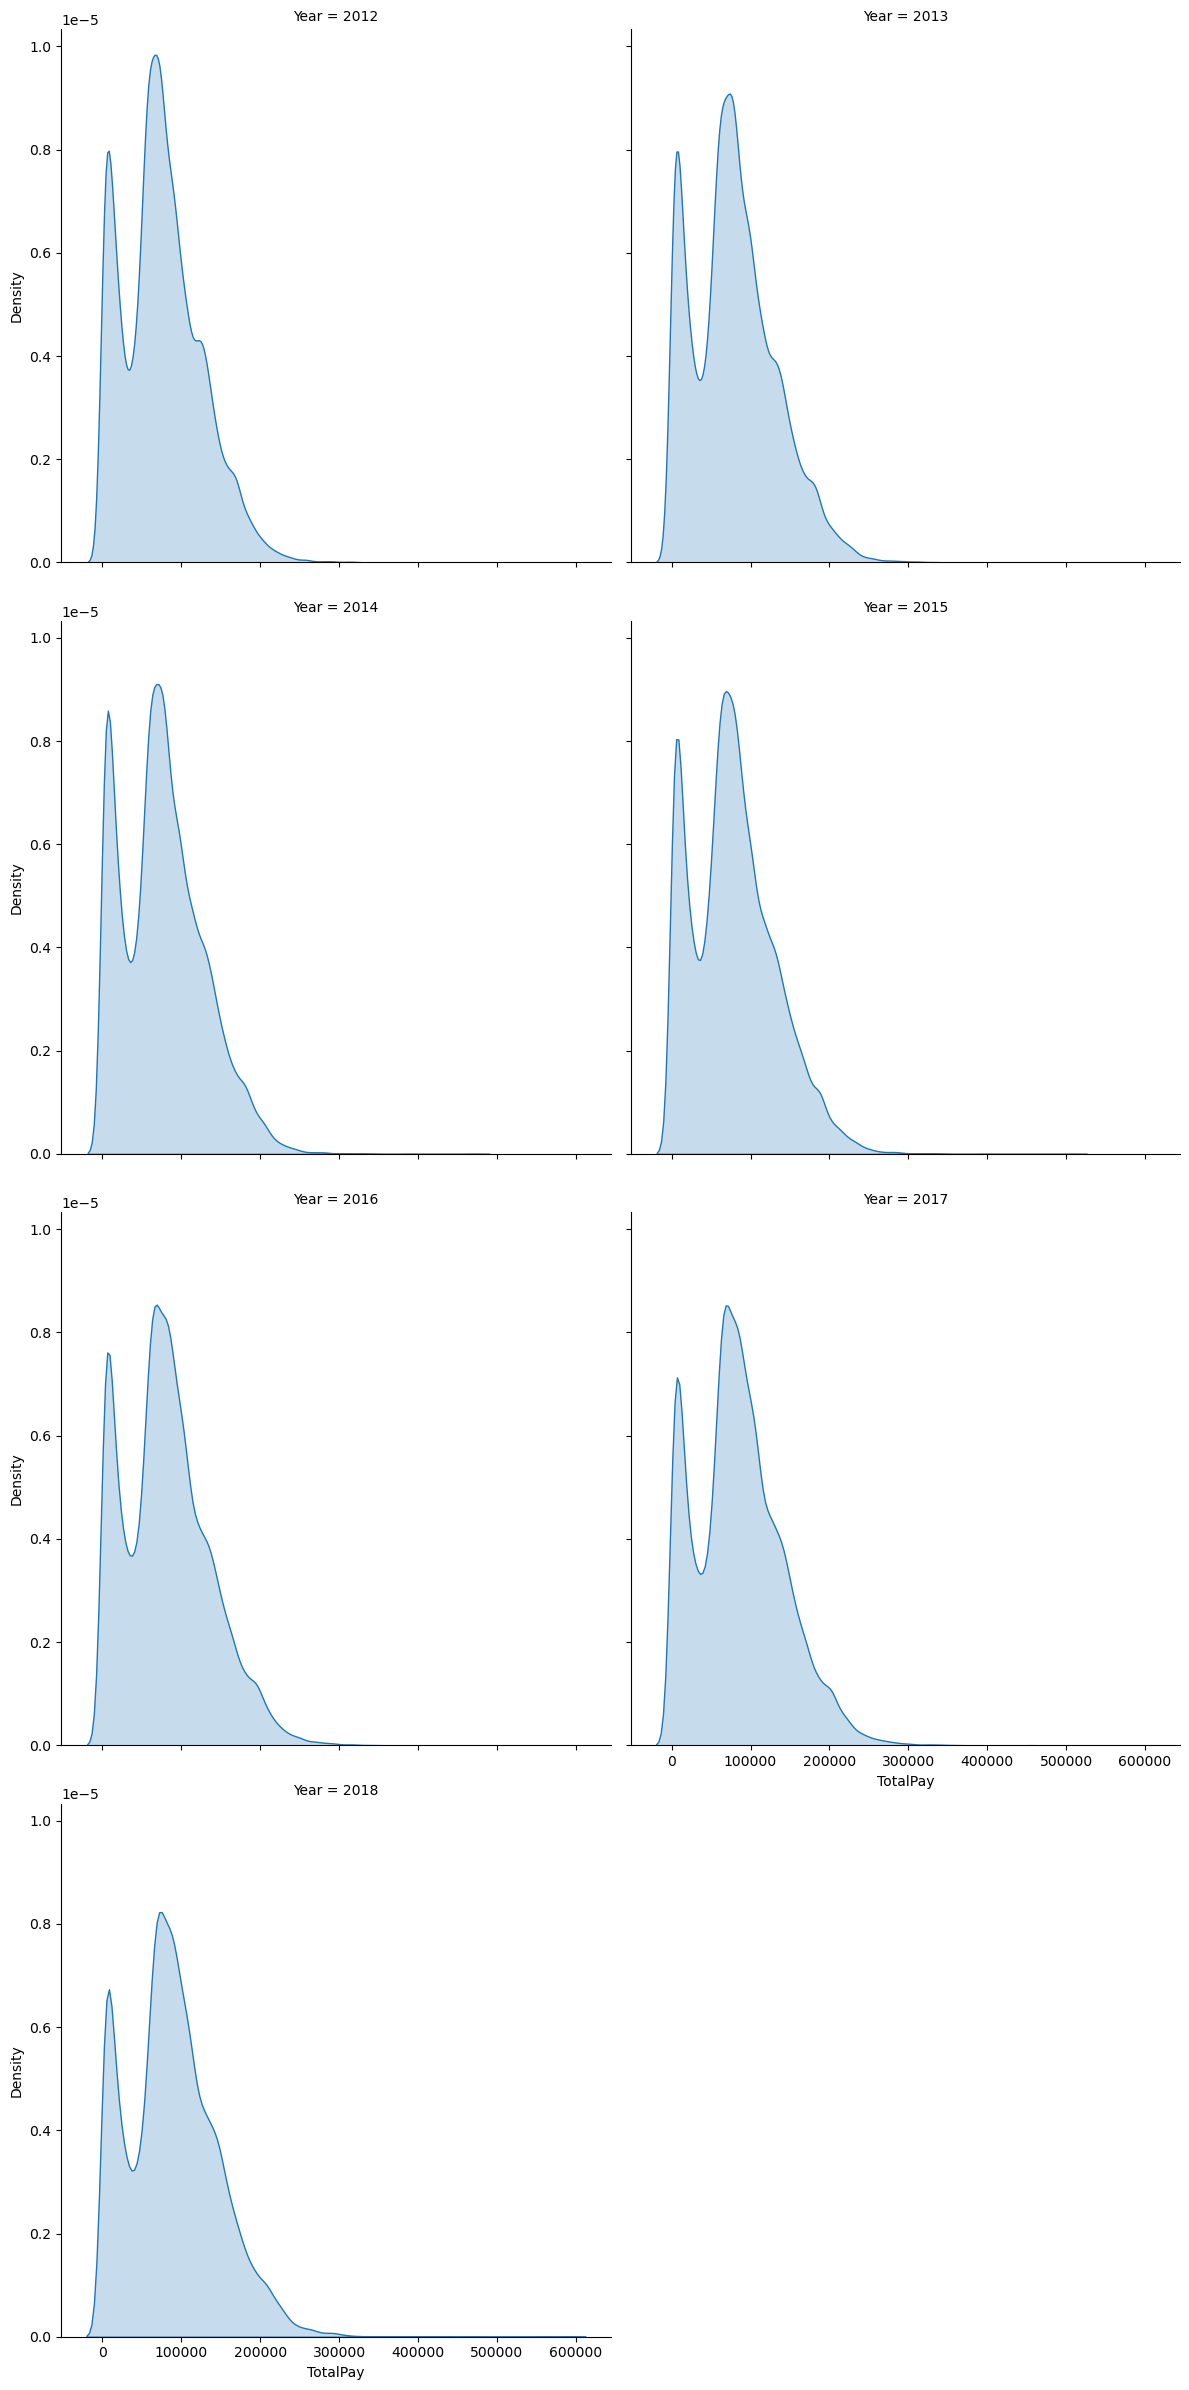

In [38]:
graph = sns.FacetGrid(df, col="Year", col_wrap=2, height=6, dropna=True)
graph.map(sns.kdeplot, 'TotalPay', shade=True)

# Heat map for data

<AxesSubplot:>

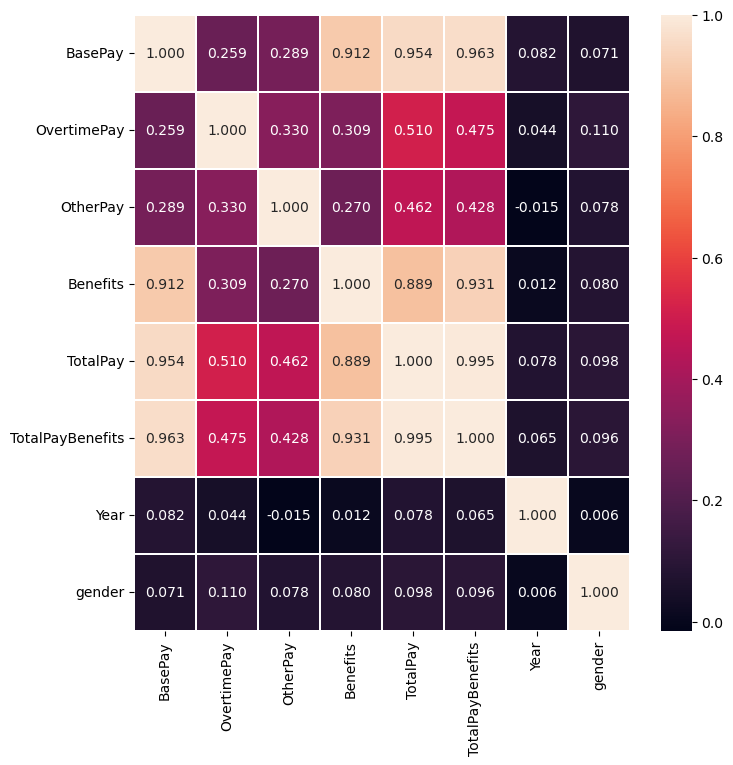

In [39]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.3, fmt= '.3f', ax=ax)

Text(0.5, 1.0, 'Most Popular 30 Jobs and Their Distribution')

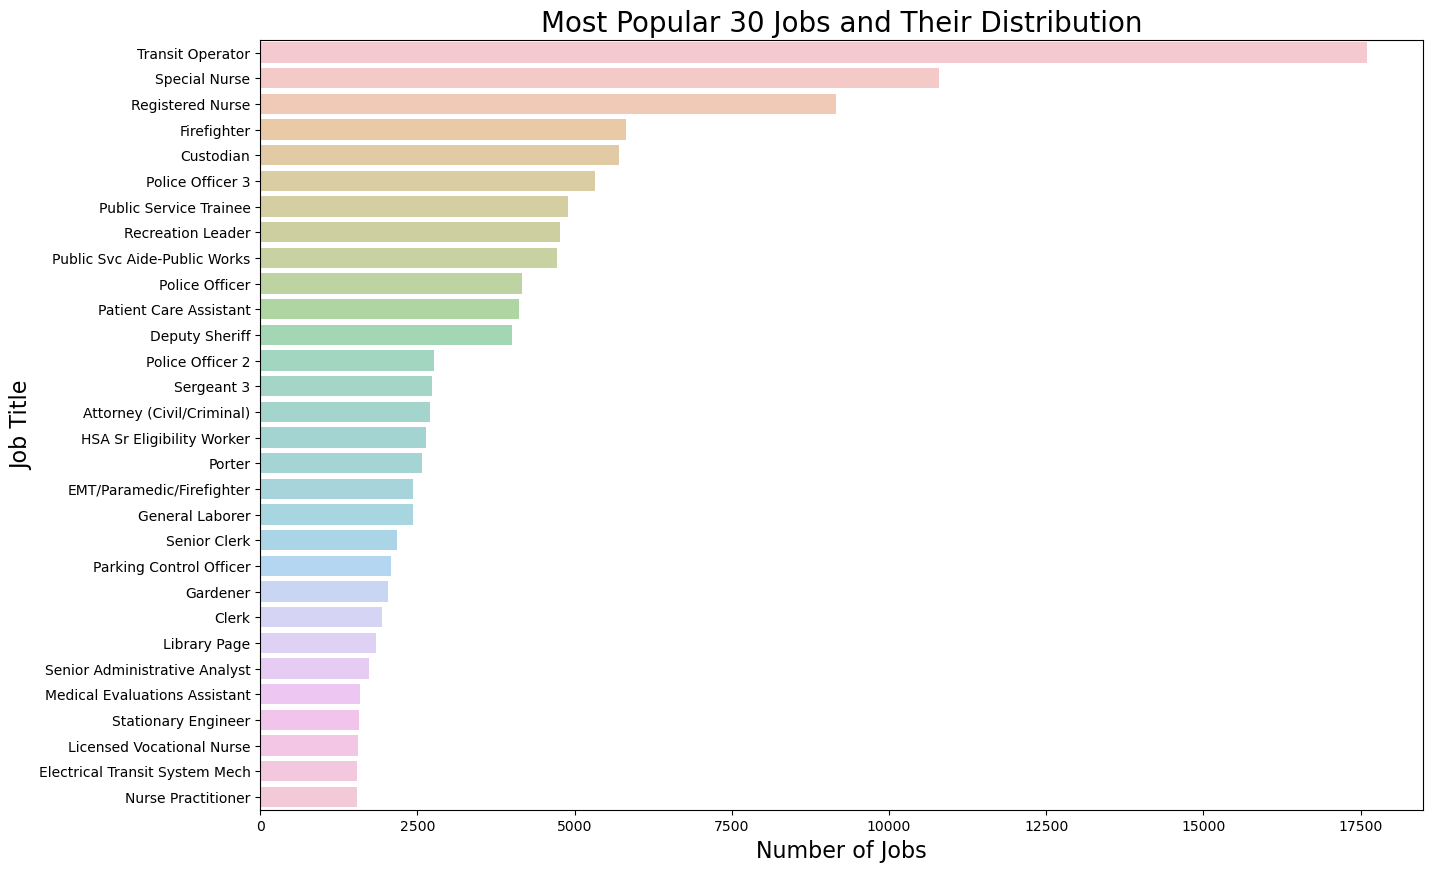

In [40]:
plt.figure(figsize=(15,10))
jobs = df['JobTitle'].value_counts()[0:30]
sns.barplot(x=jobs.values, y=jobs.index, alpha=0.5)
plt.xlabel("Number of Jobs", fontsize=16)
plt.ylabel("Job Title", fontsize=16)
plt.title("Most Popular 30 Jobs and Their Distribution", fontsize=20)

In [41]:
new_set = {'Chief, Fire Department','Asst Chf of Dept (Fire Dept)','Firefighter'}
fires = df[df['JobTitle'].isin(list(new_set))]
sorted_df = fires.sort_values(by=['JobTitle', 'Gender'])

## Comparison Between all jobs in (Fire Dapartment) ---> BasePay

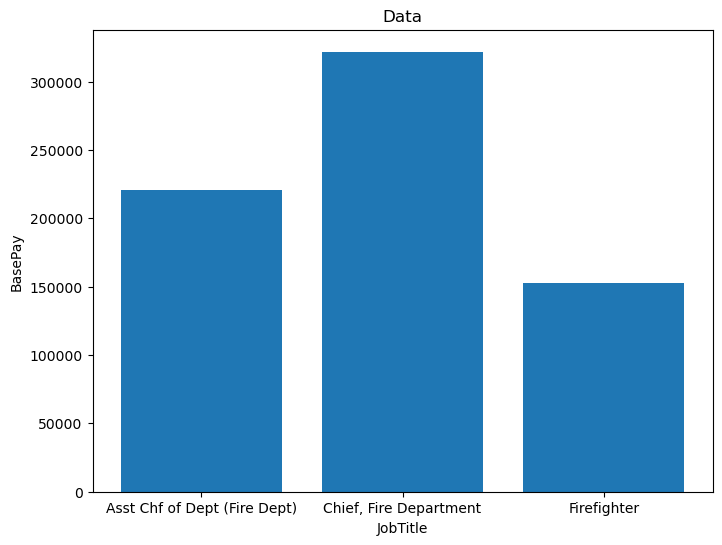

In [42]:
plt.figure(figsize=(8,6))
plt.title('Data')
plt.bar(sorted_df['JobTitle'],sorted_df['BasePay'])
plt.xlabel('JobTitle')
plt.ylabel('BasePay')
plt.show()

## BasePay based on years (Firefighter Job)

In [43]:
filter = df[df['JobTitle'] == 'Firefighter']
num2 = filter.groupby('EmployeeName').aggregate({'BasePay':'mean', 'OvertimePay':'mean', 'OtherPay':'mean', 'Benefits':'mean'
                                      ,'TotalPay':'mean' , 'TotalPayBenefits':'mean', 'Year':'max'})
counts2 = filter['EmployeeName'].value_counts()
num2['Experiences'] = counts2
fire_fighter = num2.sort_values(by='Experiences', ascending=False)

<AxesSubplot:xlabel='Experiences', ylabel='BasePay'>

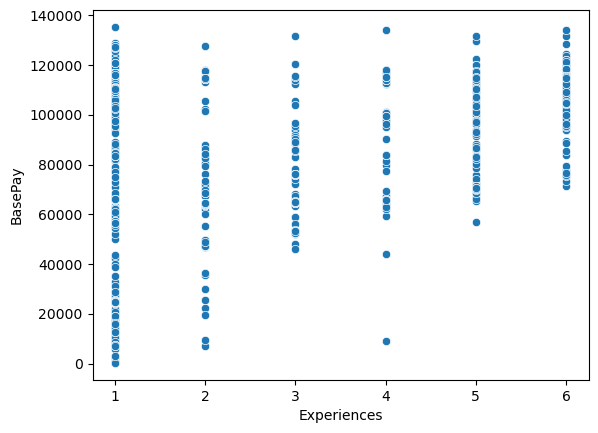

In [44]:
sns.scatterplot(x = 'Experiences', y = 'BasePay', data = fire_fighter)

In [45]:
# sns.set(style="darkgrid", color_codes=True)
# g = sns.jointplot(x="BasePay", y="Benefits", data=df)

# Models For Predicted

In [46]:
df.corr()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,gender
BasePay,1.000000,0.259359,0.288819,0.911747,0.954291,0.963477,0.081753,0.071167
OvertimePay,0.259359,1.000000,0.330196,0.309305,0.509872,0.475143,0.044247,0.110336
OtherPay,0.288819,0.330196,1.000000,0.269908,0.462086,0.428293,-0.015303,0.077873
Benefits,0.911747,0.309305,0.269908,1.000000,0.888751,0.930933,0.011955,0.080180
TotalPay,0.954291,0.509872,0.462086,0.888751,1.000000,0.994767,0.078374,0.098115
TotalPayBenefits,0.963477,0.475143,0.428293,0.930933,0.994767,1.000000,0.065104,0.096037
Year,0.081753,0.044247,-0.015303,0.011955,0.078374,0.065104,1.000000,0.006128
gender,0.071167,0.110336,0.077873,0.080180,0.098115,0.096037,0.006128,1.000000


In [47]:
# X = df[['JobTitle']]
# y = df["TotalPayBenefits"]

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# model = make_pipeline(
#     LinearRegression()
# )

# model.fit(X_train,y_train)

# print("Train_acc = ", model.score(X_train,y_train))
# print("Test_acc = ", model.score(X_test,y_test))

In [48]:
# Select the columns to use for the model
cols = ['JobTitle', 'gender']
X = df[cols]
y = df['TotalPayBenefits']

# Encode the JobTitle column using one-hot encoding
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.6736559255148036


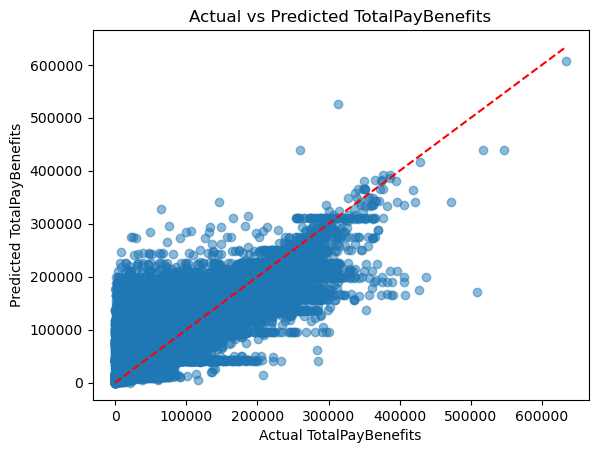

In [49]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual TotalPayBenefits')
plt.ylabel('Predicted TotalPayBenefits')
plt.title('Actual vs Predicted TotalPayBenefits')

# Adding a diagonal line for reference
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

# Show the plot
plt.show()

In [50]:
# Select input and target variables
X = df[['JobTitle', 'gender']]
y = df['TotalPayBenefits']

# Encode the JobTitle column using one-hot encoding
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree regression model
model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate model performance using R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.1799560014667867


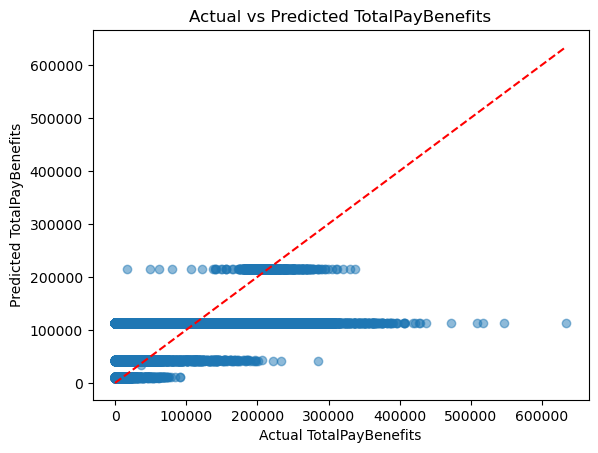

In [51]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual TotalPayBenefits')
plt.ylabel('Predicted TotalPayBenefits')
plt.title('Actual vs Predicted TotalPayBenefits')

# Adding a diagonal line for reference
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

# Show the plot
plt.show()

In [52]:
filter = df[df['JobTitle'] == 'Asst Chf of Dept (Fire Dept)']
num = filter.groupby('EmployeeName').aggregate({'BasePay':'mean', 'OvertimePay':'mean', 'OtherPay':'mean', 'Benefits':'mean'
                                      ,'TotalPay':'mean' , 'TotalPayBenefits':'mean', 'Year':'max'})
counts = filter['EmployeeName'].value_counts()
num['Experiences'] = counts
num_sorted = num.sort_values(by='Experiences', ascending=False)
num_sorted

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Experiences
EmployeeName,,,,,,,,
Kevin M Burke,194561.475000,33534.825000,53134.643333,58221.855000,281230.943333,339452.798333,2018,6
Thomas A Siragusa,195573.061667,70218.363333,46347.131667,56931.998333,312138.556667,369070.555000,2018,6
Robert F Postel,212015.728333,47696.370000,18130.680000,60514.480000,277842.778333,338357.258333,2018,6
David L Franklin,189517.562000,81183.436000,48403.906000,56405.698000,319104.904000,375510.602000,2017,5
Arthur W Kenney,161746.075000,20790.047500,86993.002500,47704.130000,269529.125000,317233.255000,2016,4
Matthew J Mcnaughton,154599.840000,0.000000,57303.140000,49675.590000,211902.980000,261578.570000,2015,2
Nicol P Juratovac,208374.455000,34990.140000,14677.015000,59157.225000,258041.610000,317198.835000,2018,2
William O Storti,217642.490000,38158.570000,31704.625000,64276.670000,287505.685000,351782.355000,2018,2
Jose L Velo,216770.345000,57600.200000,30000.620000,63834.255000,304371.165000,368205.420000,2018,2


In [53]:
lol=df[df['EmployeeName'] == 'Brook Baker']
lol

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Gender,gender
36867,Brook Baker,"Captain, Fire Suppression",147069.67,27283.49,16807.52,45608.83,191160.68,236769.51,2012,male,1
110680,Brook Baker,"Battalion Chief, Fire Suppress",179464.20,28015.89,24197.33,56634.05,231677.42,288311.47,2014,male,1
148880,Brook Baker,"Battalion Chief, Fire Suppress",180314.36,29453.26,18341.93,53597.77,228109.55,281707.32,2015,male,1
188205,Brook Baker,"Battalion Chief, Fire Suppress",181692.69,47769.97,23116.44,51363.03,252579.10,303942.13,2016,male,1
229073,Brook Baker,"Battalion Chief, Fire Suppress",185070.79,87331.61,24650.56,54870.01,297052.96,351922.97,2017,male,1
270868,Brook Baker,Asst Chf of Dept (Fire Dept),205195.66,11348.12,28273.36,60812.62,244817.14,305629.76,2018,male,1


In [54]:
lol=df[df['EmployeeName'] == 'Rex J Hale']
lol

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Gender,gender
72997,Rex J Hale,"Battalion Chief, Fire Suppress",184543.40,46156.13,28157.61,56631.64,258857.14,315488.78,2013,male,1
110612,Rex J Hale,"Battalion Chief, Fire Suppress",179464.22,37039.89,26894.45,59996.26,243398.56,303394.82,2014,male,1
148687,Rex J Hale,"Battalion Chief, Fire Suppress",180314.38,74326.13,30442.11,57110.86,285082.62,342193.48,2015,male,1
188172,Rex J Hale,"Battalion Chief, Fire Suppress",181234.81,44276.22,32082.53,54307.50,257593.56,311901.06,2016,male,1
229160,Rex J Hale,"Battalion Chief, Fire Suppress",186611.61,40914.38,33520.77,57456.64,261046.76,318503.40,2017,male,1
270764,Rex J Hale,Asst Chf of Dept (Fire Dept),205195.66,19866.75,35380.29,64000.75,260442.70,324443.45,2018,male,1


In [55]:
num['gen'] = df["Gender"]
num

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Experiences,gen
EmployeeName,,,,,,,,,
Arthur Kenney,204032.520000,29768.350000,34685.530000,53152.060000,268486.400000,321638.460000,2012,1,NaN
Arthur W Kenney,161746.075000,20790.047500,86993.002500,47704.130000,269529.125000,317233.255000,2016,4,NaN
Brook Baker,205195.660000,11348.120000,28273.360000,60812.620000,244817.140000,305629.760000,2018,1,NaN
David Franklin,204032.520000,85503.160000,26193.090000,58486.100000,315728.770000,374214.870000,2012,1,NaN
David L Franklin,189517.562000,81183.436000,48403.906000,56405.698000,319104.904000,375510.602000,2017,5,NaN
Jose L Velo,216770.345000,57600.200000,30000.620000,63834.255000,304371.165000,368205.420000,2018,2,NaN
Kevin Burke,204032.520000,23514.830000,29831.600000,58085.970000,257378.950000,315464.920000,2012,1,NaN
Kevin M Burke,194561.475000,33534.825000,53134.643333,58221.855000,281230.943333,339452.798333,2018,6,NaN
Matthew J McNaughton,215265.600000,660.470000,31213.600000,63177.620000,247139.670000,310317.290000,2013,1,NaN


In [56]:
tree = ['Chief, Fire Department','Asst Chf of Dept (Fire Dept)','Firefighter']
filter = df[df['JobTitle'].isin(tree)]
num3 = filter.groupby('EmployeeName').aggregate({'BasePay':'mean', 'OvertimePay':'mean', 'OtherPay':'mean', 'Benefits':'mean'
                                      ,'TotalPay':'mean' , 'TotalPayBenefits':'mean', 'Year':'max','gender':'max'})
counts3 = filter['EmployeeName'].value_counts()
num3['Experiences'] = counts3
fires2 = num3.sort_values(by='Experiences', ascending=False)
fires2

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,gender,Experiences
EmployeeName,,,,,,,,,
Joshua J Wilson,115480.948333,54347.085000,20497.913333,41539.261667,190325.946667,231865.208333,2018,0,6
David J Hawkins,114488.418333,56757.570000,13667.175000,39646.365000,184913.163333,224559.528333,2018,1,6
Theodore R Creighton,115287.298333,11436.968333,15854.381667,40412.498333,142578.648333,182991.146667,2018,0,6
David F Aymerich,115462.750000,2456.210000,15128.528333,40373.808333,133047.488333,173421.296667,2018,1,6
Maria S Nilsson,115213.286667,46157.511667,19224.345000,41086.731667,180595.143333,221681.875000,2018,0,6
...,...,...,...,...,...,...,...,...,...
John Hernandez,109783.860000,15716.760000,18158.820000,37740.090000,143659.440000,181399.530000,2012,1,1
John Harrington,109783.850000,21750.450000,11278.540000,37251.920000,142812.840000,180064.760000,2012,1,1
John H Danner III,115893.440000,30622.600000,19271.230000,41044.360000,165787.270000,206831.630000,2013,1,1


In [57]:
# Select input and target variables
X = fires2[['Experiences', 'OvertimePay']]
y = fires2['BasePay']

# Encode the JobTitle column using one-hot encoding
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree regression model
model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate model performance using R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)

R-squared score: 0.5978851965170592


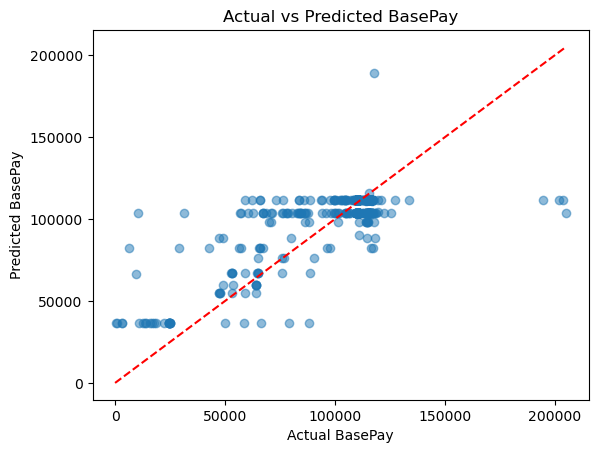

In [58]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual BasePay')
plt.ylabel('Predicted BasePay')
plt.title('Actual vs Predicted BasePay')

# Adding a diagonal line for reference
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

# Show the plot
plt.show()

In [59]:
# Select the columns to use for the model
cols = ['Experiences', 'OvertimePay']
X = fires2[cols]
y = fires2['BasePay']

# Encode the JobTitle column using one-hot encoding
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.3131995072119198


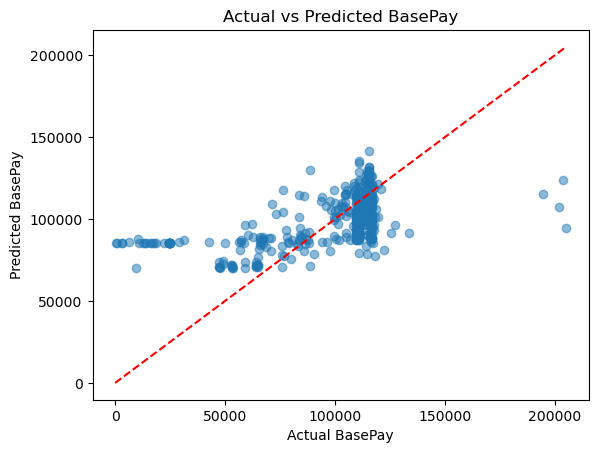

In [60]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual BasePay')
plt.ylabel('Predicted BasePay')
plt.title('Actual vs Predicted BasePay')

# Adding a diagonal line for reference
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

# Show the plot
plt.show()